In [66]:
import json
import pandas as pd
json_file = "BDNF_codons_renamed.fasta_codon_macse.fas.MEME.json"

In [67]:
with open(json_file) as json_handle :
    data = json.load(json_handle)
    
    
#data2 = data["MLE"]["Content"]["0"]

In [68]:
data2 = data["MLE"]["content"]["0"]
#type(data2[0])
data2[1]

[9999.99999999834,
 0.09569080967713574,
 1,
 3.645323773955913,
 0,
 0,
 0.6666666666666666,
 0,
 0,
 -10.04756235316737,
 -10.04756235317269]

In [69]:
df = pd.DataFrame (data2,columns=['alpha',
                                  'beta-',
                                  'p-', 
                                  'beta+', 
                                  'p+', 
                                  'LRT' ,
                                  'p-value',
                                  'num_branches',
                                  'TotalBranchLength',
                                  'MEME_LogL',
                                  'FEL_LogL'])
df.index += 1

df

,alpha,beta-,p-,beta+,p+,LRT,p-value,num_branches,TotalBranchLength,MEME_LogL,FEL_LogL
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0,0,0.000000,0.000000
2,10000.000000,0.095691,1.000000,3.645324,0.000000,0.000000e+00,0.666667,0,0,-10.047562,-10.047562
3,0.340686,0.000000,0.060000,0.375421,0.940000,1.515223e-02,0.634509,0,0,-18.519908,-18.512592
4,0.000000,0.000000,0.946634,50.343190,0.053366,5.841145e+00,0.024461,1,0,-26.987381,-24.127373
5,0.658622,0.008546,0.022911,0.790273,0.977089,2.087511e-02,0.628395,0,0,-28.618787,-28.616259
...,...,...,...,...,...,...,...,...,...,...,...
630,159.000000,2.018868,1.000000,0.991684,0.000000,0.000000e+00,0.666667,0,0,-7.646046,-7.646046
631,2.298969,0.000000,0.010000,10000.000000,0.990000,-4.178347e-11,0.666667,0,0,-8.261853,-8.261853
632,52.333333,0.000000,1.000000,78.500000,0.000000,0.000000e+00,0.666667,0,0,-6.037142,-6.037142
633,10000.000000,1.783870,1.000000,1.461179,0.000000,0.000000e+00,0.666667,0,0,-8.777398,-8.777398


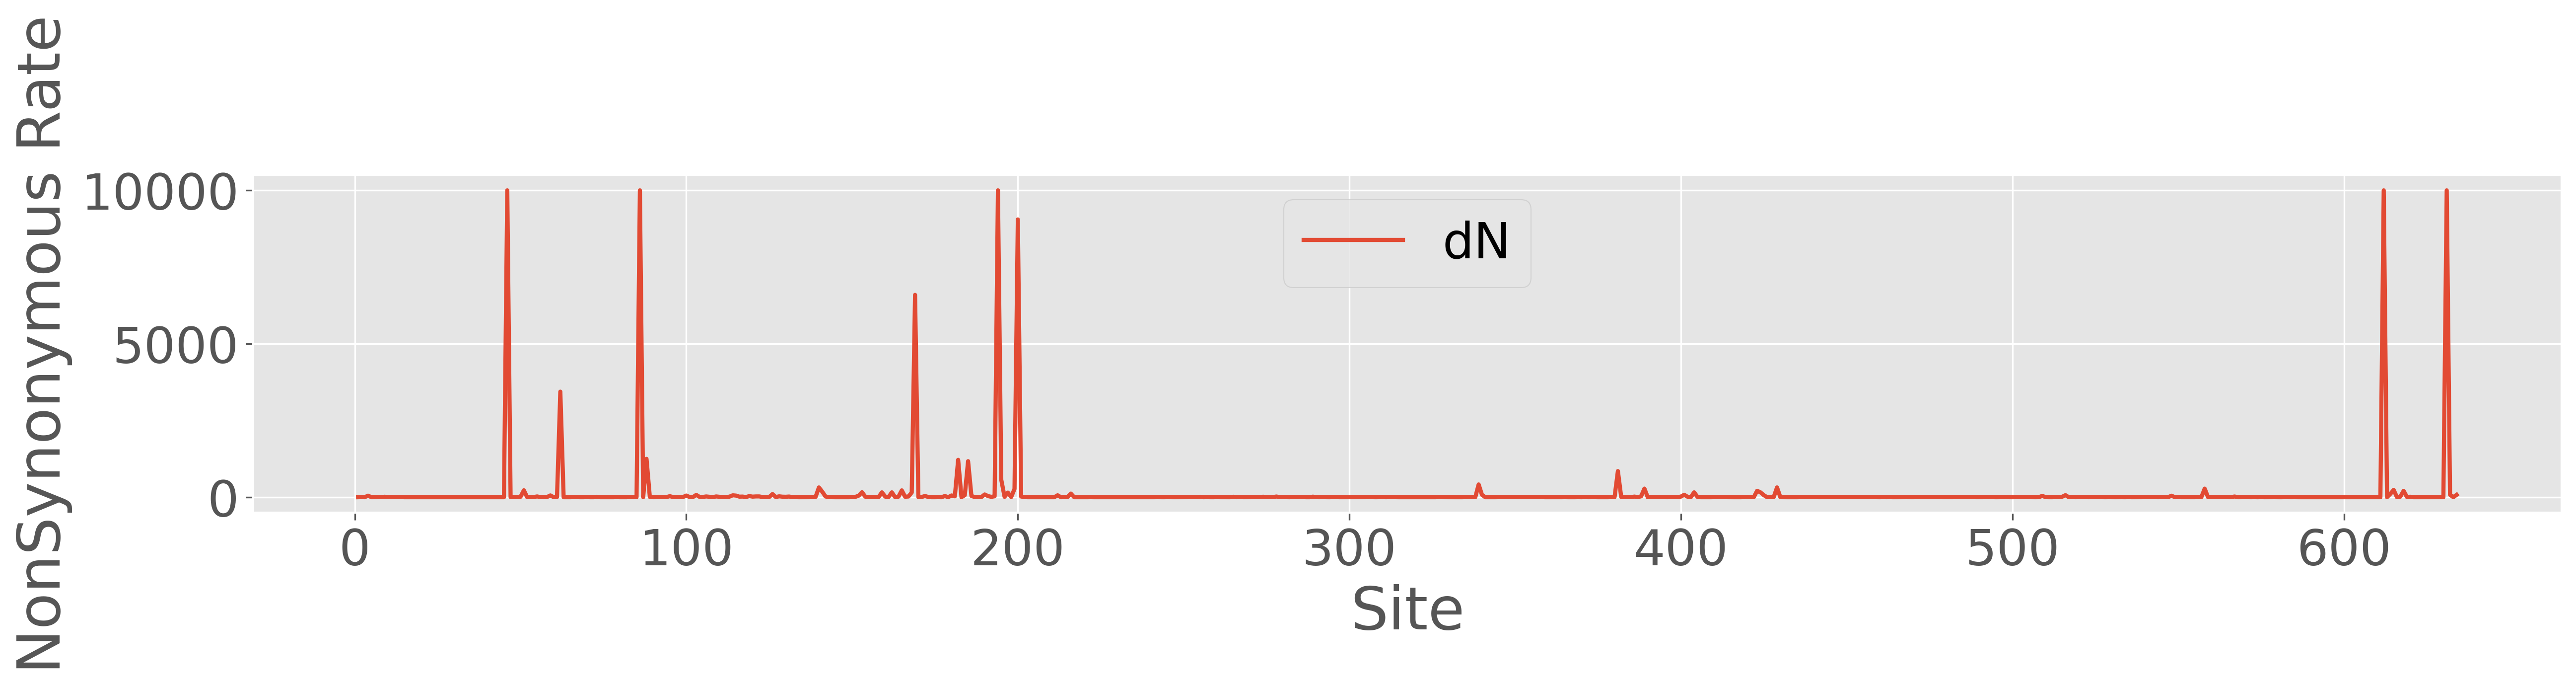

In [139]:
# plots

#df["alpha"].plot(logy=True)
#df["beta-"].plot()
from matplotlib import pyplot as plt
#df["beta+"].plot(logy=True)
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 300
plt.rcParams.update({'font.size': 24})
#plt.style.use('presentation')
#norm = [float(i)/sum(df["beta+"]) for i in df["beta+"]]
#plt.plot(norm, label="dN", linewidth=2, markersize=0, marker='o')
plt.plot(df["beta+"], label="dN", linewidth=2, markersize=0, marker='o')
plt.xlabel("Site")
plt.ylabel("NonSynonymous Rate")
plt.title('')
plt.legend()
plt.show()


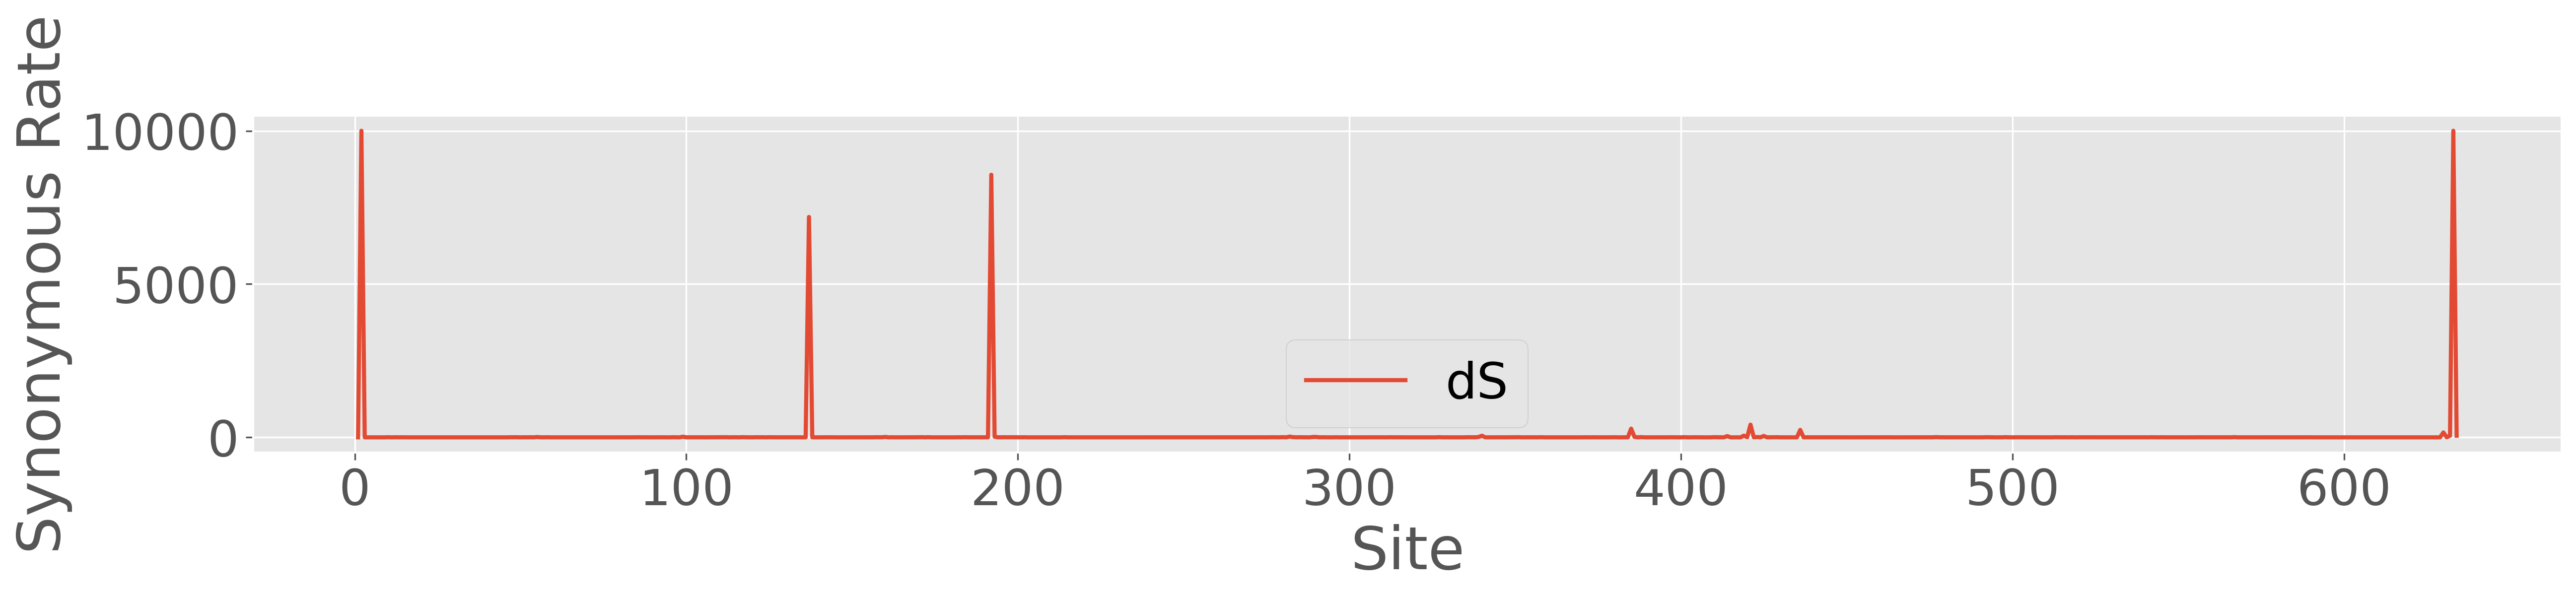

In [138]:
from matplotlib import pyplot as plt
#df["beta+"].plot(logy=True)
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 300
plt.rcParams.update({'font.size': 24})


#plt.style.use('presentation')
plt.plot(df["alpha"], label="dS", linewidth=2, markersize=0, marker='o')
plt.xlabel("Site")
plt.ylabel("Synonymous Rate")
plt.title('')
plt.legend()
plt.show()


In [137]:
df2 = df.loc[df['p-value'] <= 0.05]

#df2["Site"] = df2.index
#df2.insert(0, "Site")

df2 = df2.drop(columns=["p-", "p+", "num_branches", "TotalBranchLength"])
a = df2.head().to_markdown()
#a.replace("\n","")
a = str(a)
a

'|     |    alpha |    beta- |     beta+ |      LRT |     p-value |   MEME_LogL |   FEL_LogL |\n|----:|---------:|---------:|----------:|---------:|------------:|------------:|-----------:|\n|   4 | 0        | 0        |   50.3432 |  5.84115 | 0.0244611   |    -26.9874 |   -24.1274 |\n|  54 | 0.342534 | 0.159822 |    5.5018 |  5.00541 | 0.037597    |    -48.106  |   -47.5525 |\n|  62 | 0.84151  | 0        | 3439.43   |  7.72815 | 0.00932452  |    -29.4663 |   -24.8105 |\n|  83 | 0.65602  | 0        |   10.3659 |  5.26603 | 0.0328728   |    -29.6231 |   -25.4202 |\n| 100 | 1.42737  | 0        |   54.0502 | 17.8319  | 5.64558e-05 |    -99.2736 |   -84.0854 |'

In [119]:
df2.count

<bound method DataFrame.count of         alpha     beta-        p-         beta+        p+        LRT  \
4    0.000000  0.000000  0.946634     50.343190  0.053366   5.841145   
54   0.342534  0.159822  0.561520      5.501801  0.438480   5.005409   
62   0.841510  0.000000  0.987313   3439.428519  0.012687   7.728149   
83   0.656020  0.000000  0.944320     10.365927  0.055680   5.266034   
100  1.427366  0.000000  0.911937     54.050223  0.088063  17.831943   
105  1.361710  0.000000  0.771004      8.595219  0.228996   4.907564   
106  0.387244  0.387244  0.860785     24.395062  0.139215  12.608639   
113  0.989135  0.000000  0.764280     16.984548  0.235720  10.761418   
119  1.494196  0.000000  0.801067     36.892564  0.198933   8.259222   
128  0.852070  0.852070  0.881704     28.623955  0.118296   5.722326   
129  1.165665  0.376546  0.889877     16.785935  0.110123   6.755020   
130  1.293757  0.000000  0.832157     13.981505  0.167843   7.364383   
139  0.000000  0.000000  0.8310

## Test code below